<h3>1 - Introdução e considerações iniciais:</h3>
<p>
A empresa contratante pede uma análise de que tipo de filme deve ser desenvolvido. Pode-se realizar essa análise de diversas formas, estando em consideração também a variável que quer ser otimizada. 

Um ângulo de análise é ver que fatores contribuem para uma nota maior no site IMBD ou no Metascore, porém, como se trata de um estúdio de Hollywood, irá se partir do princípio que a variável que deseja ser otimizada é o faturamento. 

Para definir o que seria o tipo de um filme, vale fazer um exercício de pensamento: como uma pessoa é induzida a ver um filme? Intuitivamente, vem à mente o gênero, diretor, atores e a sinopse (overview) desse filme. É possível analisar quais nomes são relacionados a um faturamento maior e quais temas são favorecidos.   

Também pode ser interessante explorar a relação entre a classificação indicativa (certificate), duração do filme (runtime) e até a escolha de título.

Dito isso, para a previsão do tipo de filme mais rentável, não podemos utilizar a nota em consideração, pois violaria o princípio de causalidade. 

Para poder responder todas as questões propostas, é preciso a análise das notas do IMDB. Similar ao caso anterior, vamos analisar os mesmos fatores. Porém, para uma análise mais completa, também deve-se levar em consideração o ano de lançamento, o número de votos, a nota do Metascore e o faturamento.  
</p>

<h3>Análise e tratamento dos dados</h3>
<p>
O primeiro passo a ser tomado é entender que tipos de dados estão presentes, para então ajustar os campos necessários.  
</p>


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [41]:
sm.__version__

'0.14.0'

In [2]:
df = pd.read_csv('desafio_indicium_imdb.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
None


<h4> Tratamento: Juntar os atores em uma única coluna </h4>

In [4]:
df['Stars'] = df[df.columns[10:14]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
df = df.drop(["Star1","Star2","Star3","Star4"], axis=1)
df.columns

Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'No_of_Votes', 'Gross', 'Stars'],
      dtype='object')

<h4>Tratamento de dados da coluna "Gross": tipo de string para float</h4>

In [5]:
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)


<h4>Tratamento de dados da coluna "Gross": Trocar valores vazios pela média</h4>


In [6]:
gross_mean = df['Gross'].mean()
df['Gross'] = df['Gross'].transform(lambda x: x.fillna(gross_mean))

<h4>Tratamento dos dados coluna "Runtime": tipo de string para float</h4>

In [7]:
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(float)

<h4>Tratamento dos dados coluna "Released_Year": correção do ano no filme "Apollo 13"</h4>

In [8]:
df.loc[df['Series_Title'] == 'Apollo 13', 'Released_Year'] = 1995


<h4>Tratamento dos dados coluna "Released_Year": tipo de string para float</h4>

In [9]:
df['Released_Year'] = df['Released_Year'].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    float64
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    float64
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  No_of_Votes    999 non-null    int64  
 11  Gross          999 non-null    float64
 12  Stars          999 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 101.6+ KB


<h3>EDA: Gross</h3>

<h4>Média de rendimento de acordo com o gênero</h4>

In [11]:
df['Genre'] = df['Genre'].str.split(", ")
df_exploded = df.explode("Genre")
grouped_df = df_exploded.groupby('Genre')['Gross'].mean().reset_index()
grouped_df.sort_values(by="Gross", ascending=False)

,Genre,Gross
1,Adventure,1.527779e+08
16,Sci-Fi,1.408672e+08
0,Action,1.284659e+08
2,Animation,1.170130e+08
8,Fantasy,1.024753e+08
7,Family,8.938265e+07
4,Comedy,6.483863e+07
18,Thriller,6.053035e+07
10,History,5.845131e+07
3,Biography,5.678579e+07


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Animation'),
  Text(3, 0, 'Biography'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Crime'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Family'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'Film-Noir'),
  Text(10, 0, 'History'),
  Text(11, 0, 'Horror'),
  Text(12, 0, 'Music'),
  Text(13, 0, 'Musical'),
  Text(14, 0, 'Mystery'),
  Text(15, 0, 'Romance'),
  Text(16, 0, 'Sci-Fi'),
  Text(17, 0, 'Sport'),
  Text(18, 0, 'Thriller'),
  Text(19, 0, 'War'),
  Text(20, 0, 'Western')])

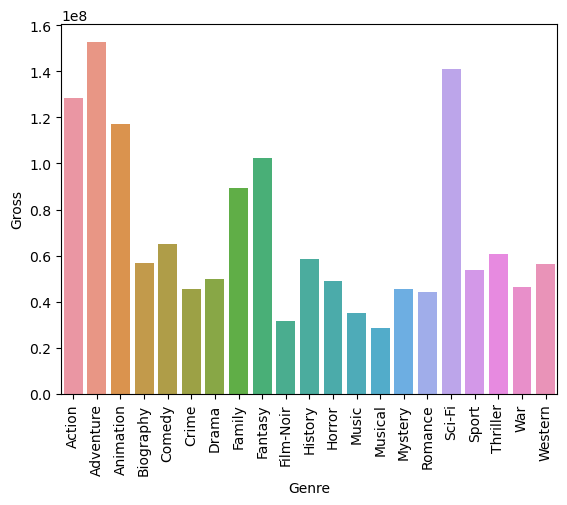

In [12]:
sns.barplot(data=grouped_df, x='Genre', y='Gross')
plt.xticks(rotation=90)

Os generos com maior rendimento são de Aventura, Ficção cientifica e Ação

<h4>Média de rendimento de acordo com o diretor</h4>


In [13]:
grouped_df = df.groupby('Director')['Gross'].mean().reset_index()
grouped_df.sort_values(by="Gross", ascending=False).head()

,Director,Gross
36,Anthony Russo,5.512599e+08
148,Gareth Edwards,5.321773e+08
195,J.J. Abrams,4.743903e+08
261,Josh Cooley,4.340380e+08
428,Roger Allers,4.227838e+08


<h4>Média de rendimento de acordo com os atores</h4>


In [14]:
df['Stars'] = df['Stars'].astype(str).str.split(",")
df_exploded = df.explode("Stars")
grouped_df = df_exploded.groupby('Stars')['Gross'].mean().reset_index()
grouped_df.sort_values(by="Gross", ascending=False).head()

,Stars,Gross
1214,John Boyega,936662225.0
494,Daisy Ridley,936662225.0
1781,Michelle Rodriguez,760507625.0
270,Billy Zane,659325379.0
970,Huck Milner,608581744.0


Os atores que tem a maior média de rendimento, John Boyega e Daisy Ridley, são estrelas dos filmes recentes de Star Wars e tem uma filmografia relativamente pequena fora disso. Assim, podem ser considerados como "pontos fora da curva"

In [15]:
grouped_df.drop(grouped_df[grouped_df['Stars'] == 'John Boyega'].index, inplace=True)
grouped_df.drop(grouped_df[grouped_df['Stars'] == 'Daisy Ridley'].index, inplace=True)
grouped_df.sort_values(by="Gross", ascending=False).head()

,Stars,Gross
1781,Michelle Rodriguez,7.605076e+08
270,Billy Zane,6.593254e+08
2272,Sarah Vowell,6.085817e+08
970,Huck Milner,6.085817e+08
1204,Joe Russo,5.512599e+08


<h4>Média de rendimento de acordo com a duração</h4>


In [16]:
run_cte = sm.add_constant(df['Runtime'])
model = sm.OLS(df['Gross'],run_cte).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Gross   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     15.80
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           7.53e-05
Time:                        21:31:54   Log-Likelihood:                -19812.
No. Observations:                 999   AIC:                         3.963e+04
Df Residuals:                     997   BIC:                         3.964e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.342e+07   1.41e+07      0.951      0.3

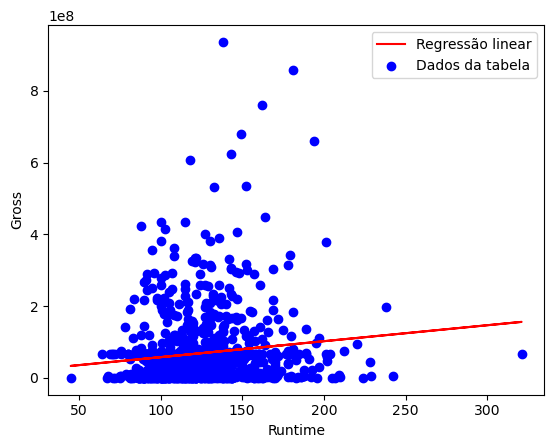

In [17]:
plt.plot(df['Runtime'],model.predict(run_cte),color="red",label="Regressão linear")
plt.scatter(df['Runtime'],df['Gross'], color="blue",label="Dados da tabela")
plt.xlabel('Runtime')
plt.ylabel('Gross')
plt.legend()
plt.show()

O lucro aparenta crescer levemente com o aumento da duração do filme.
Os maiores rendimentos estão na faixa de 100 a 200 minutos

<h4>Média de Rendimento de acordo com a classificação indicativa</h4>


In [18]:
grouped_df = df.groupby('Certificate')['Gross'].mean().reset_index()
grouped_df.sort_values(by="Gross", ascending=False)

,Certificate,Gross
14,UA,1.268216e+08
12,U,8.446207e+07
0,16,6.808257e+07
9,TV-14,6.808257e+07
10,TV-MA,6.808257e+07
1,A,6.443238e+07
3,G,5.267737e+07
11,TV-PG,4.542394e+07
6,PG-13,3.984411e+07
5,PG,3.552411e+07


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '16'),
  Text(1, 0, 'A'),
  Text(2, 0, 'Approved'),
  Text(3, 0, 'G'),
  Text(4, 0, 'GP'),
  Text(5, 0, 'PG'),
  Text(6, 0, 'PG-13'),
  Text(7, 0, 'Passed'),
  Text(8, 0, 'R'),
  Text(9, 0, 'TV-14'),
  Text(10, 0, 'TV-MA'),
  Text(11, 0, 'TV-PG'),
  Text(12, 0, 'U'),
  Text(13, 0, 'U/A'),
  Text(14, 0, 'UA'),
  Text(15, 0, 'Unrated')])

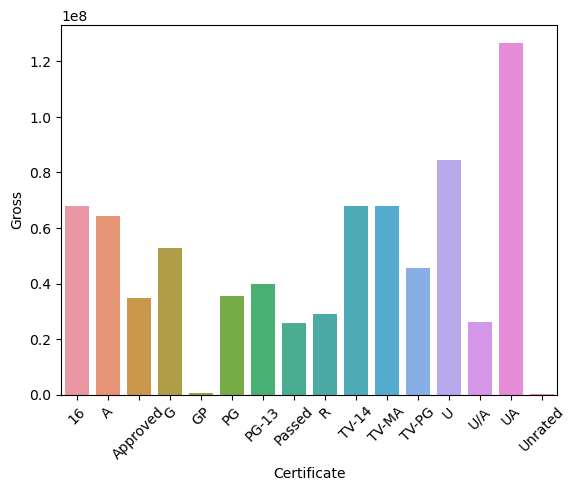

In [19]:
sns.barplot(data=grouped_df, x='Certificate', y='Gross')
plt.xticks(rotation=45)

O sistema de classificação indicativa da tabela utiliza padrões de diversos paises, e algumas delas se enquadram em mais de uma categoria do EUA. Porém, as classificações "U/A", "UA", "16", "TV-14" correspondem a "PG-13". Portanto, consirando uma empresa estadounidense, a classificação mais rentável é PG-13


<h4>Conclusão</h4>
<h4>2.b</h4>
Um bom filme para ser produzido:
Genero: Aventura, Ficção cientifica ou Ação
Classificação indicativa: PG-13
Diretor: Anthony Russo ou Gareth Edwards
Duração: 100 a 200min
Atores: Michelle Rodriguez, Billy Zane, Sarah Vowell ou	Huck Milner

<h3>EDA: IMDB_Rating</h3>

<h4>Nota x Rendimento</h4>


Regressão linear:

In [20]:
gross_cte = sm.add_constant(df['Gross'])
model = sm.OLS(df['IMDB_Rating'],gross_cte).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            IMDB_Rating   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     8.692
Date:                Thu, 04 Jul 2024   Prob (F-statistic):            0.00327
Time:                        21:31:55   Log-Likelihood:                -113.09
No. Observations:                 999   AIC:                             230.2
Df Residuals:                     997   BIC:                             240.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9307      0.010    763.963      0.0

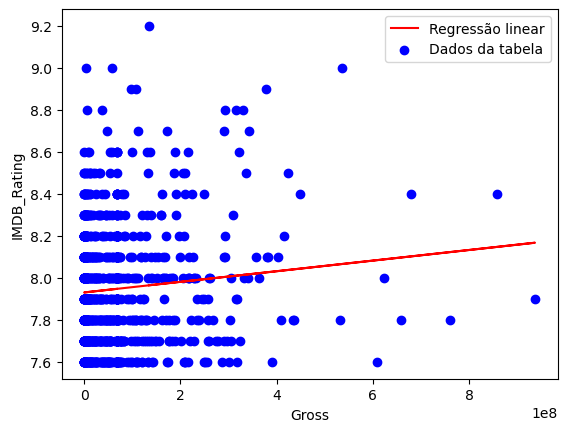

In [21]:
plt.plot(df['Gross'],model.predict(gross_cte),color="red",label="Regressão linear")
plt.scatter(df['Gross'],df['IMDB_Rating'], color="blue",label="Dados da tabela")
plt.xlabel('Gross')
plt.ylabel('IMDB_Rating')
plt.legend()
plt.show()

Os pontos amostrais ligados a menores lucros estão localizados em diversas notas.
É possível ver que a relação entre nota e lucro é pequena.

<h4>Nota x Genero</h4>


In [22]:
df_exploded = df.explode("Genre")
grouped_df = df_exploded.groupby('Genre')['IMDB_Rating'].mean().reset_index()
grouped_df.sort_values(by="IMDB_Rating", ascending=False)


,Genre,IMDB_Rating
19,War,8.013725
20,Western,8.000000
9,Film-Noir,7.989474
16,Sci-Fi,7.977612
14,Mystery,7.967677
6,Drama,7.957538
5,Crime,7.954545
10,History,7.953571
1,Adventure,7.952041
0,Action,7.948677


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Animation'),
  Text(3, 0, 'Biography'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Crime'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Family'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'Film-Noir'),
  Text(10, 0, 'History'),
  Text(11, 0, 'Horror'),
  Text(12, 0, 'Music'),
  Text(13, 0, 'Musical'),
  Text(14, 0, 'Mystery'),
  Text(15, 0, 'Romance'),
  Text(16, 0, 'Sci-Fi'),
  Text(17, 0, 'Sport'),
  Text(18, 0, 'Thriller'),
  Text(19, 0, 'War'),
  Text(20, 0, 'Western')])

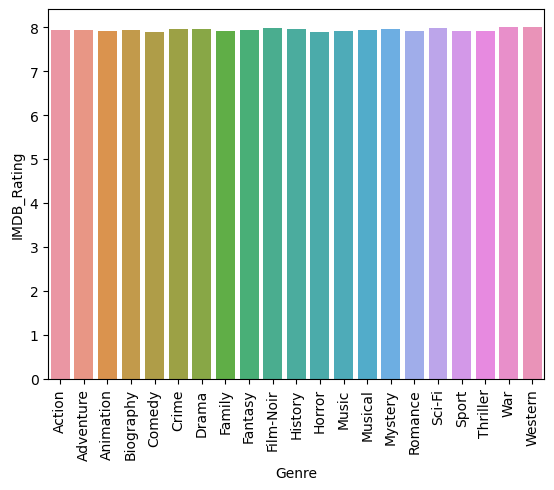

In [23]:
sns.barplot(data=grouped_df, x='Genre', y='IMDB_Rating')
plt.xticks(rotation=90)

O genero não parece afetar as notas. 

<h4>Nota x Diretor </h4>


In [24]:
grouped_df = df.groupby('Director')['IMDB_Rating'].mean().reset_index()
grouped_df.sort_values(by="IMDB_Rating", ascending=False).head()

,Director,IMDB_Rating
191,Irvin Kershner,8.7
284,Lana Wachowski,8.7
158,George Lucas,8.6
427,Roberto Benigni,8.6
141,Frank Darabont,8.6


A escolha de diretor parece impactar as notas.

<h4>Nota x Duração</h4>


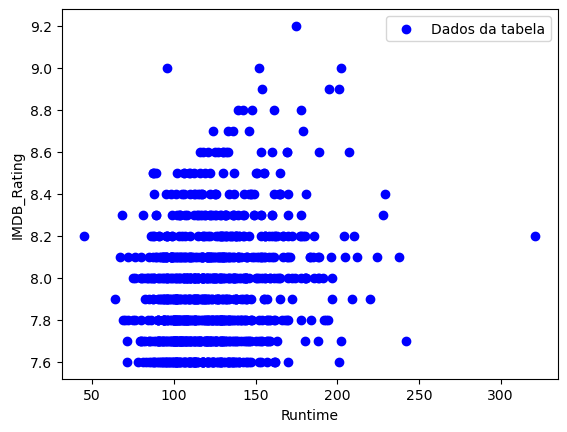

In [25]:
plt.scatter(df['Runtime'],df['IMDB_Rating'], color="blue",label="Dados da tabela")
plt.xlabel('Runtime')
plt.ylabel('IMDB_Rating')
plt.legend()
plt.show()

Não há correlação.
As maiores notas são para filmes com duração de 150 a 200 minutos, aproximadamente. 

<h4>Nota x Atores</h4>


In [26]:
df_exploded = df.explode("Stars")
grouped_df = df_exploded.groupby('Stars')['IMDB_Rating'].mean().reset_index()
grouped_df.sort_values(by="IMDB_Rating", ascending=False).head()

,Stars,IMDB_Rating
2,Aaron Eckhart,9.0
367,Caroline Goodall,8.9
1263,John Travolta,8.9
2287,Sean Bean,8.8
1719,Meat Loaf,8.8


<h4>Nota x Certificado</h4>


In [27]:
grouped_df = df.groupby('Certificate')['IMDB_Rating'].mean().reset_index()
grouped_df.sort_values(by="IMDB_Rating", ascending=False)

,Certificate,IMDB_Rating
9,TV-14,8.300000
0,16,8.100000
10,TV-MA,8.100000
15,Unrated,8.100000
7,Passed,8.020588
3,G,8.000000
1,A,7.992347
12,U,7.976923
14,UA,7.957143
2,Approved,7.945455


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '16'),
  Text(1, 0, 'A'),
  Text(2, 0, 'Approved'),
  Text(3, 0, 'G'),
  Text(4, 0, 'GP'),
  Text(5, 0, 'PG'),
  Text(6, 0, 'PG-13'),
  Text(7, 0, 'Passed'),
  Text(8, 0, 'R'),
  Text(9, 0, 'TV-14'),
  Text(10, 0, 'TV-MA'),
  Text(11, 0, 'TV-PG'),
  Text(12, 0, 'U'),
  Text(13, 0, 'U/A'),
  Text(14, 0, 'UA'),
  Text(15, 0, 'Unrated')])

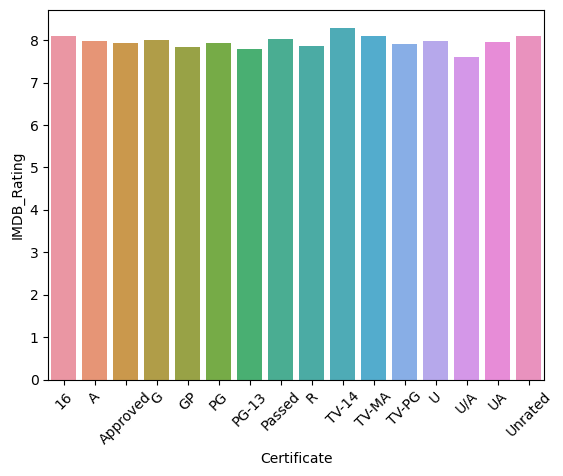

In [28]:
sns.barplot(data=grouped_df, x='Certificate', y='IMDB_Rating')
plt.xticks(rotation=45)

A classificação indicativa parece não afetar muito a nota

<h4>Nota x Ano</h4>


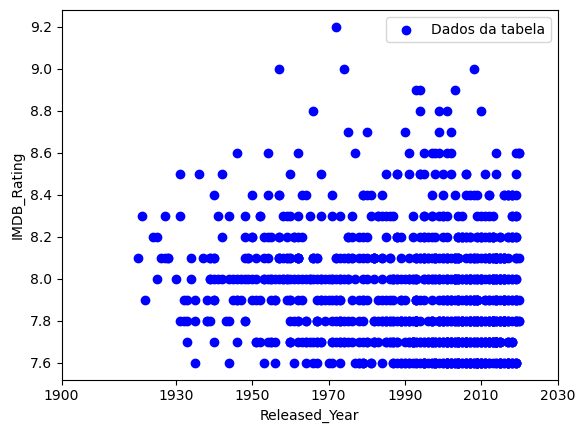

In [31]:
plt.scatter(df['Released_Year'],df['IMDB_Rating'], color="blue",label="Dados da tabela")
plt.xlabel('Released_Year')
plt.ylabel('IMDB_Rating')
plt.legend()
plt.xticks([1900, 1930, 1950, 1970, 1990, 2010, 2030])
plt.show()

Não há correlação, porém os filmes com maior nota tem ano de lançamento de 1950 até 2010, aproximadamente.

<h4>Nota x Nº votos</h4>


<Axes: xlabel='No_of_Votes', ylabel='IMDB_Rating'>

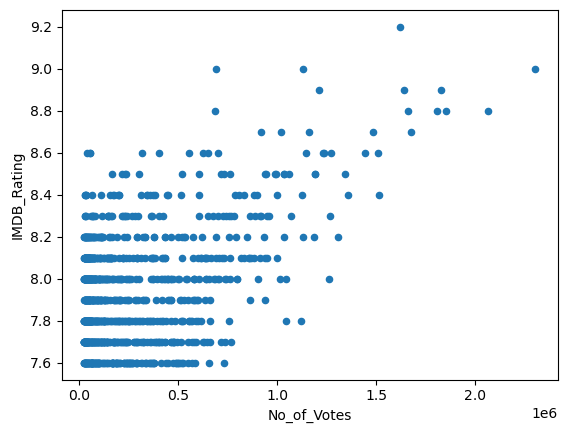

In [30]:
df.plot(kind='scatter', x='No_of_Votes', y='IMDB_Rating')

In [32]:
n_cte = sm.add_constant(df['No_of_Votes'])
model = sm.OLS(df['IMDB_Rating'],n_cte).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            IMDB_Rating   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     297.4
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           1.62e-58
Time:                        21:34:36   Log-Likelihood:                 12.950
No. Observations:                 999   AIC:                            -21.90
Df Residuals:                     997   BIC:                            -12.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.8375      0.010    790.663      

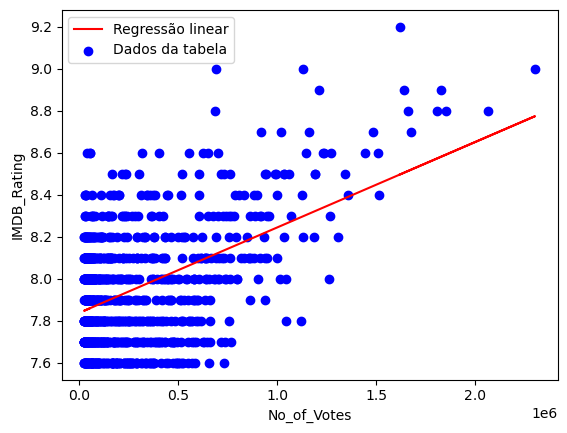

In [34]:
plt.plot(df['No_of_Votes'],model.predict(n_cte),color="red",label="Regressão linear")
plt.scatter(df['No_of_Votes'],df['IMDB_Rating'], color="blue",label="Dados da tabela")
plt.xlabel('No_of_Votes')
plt.ylabel('IMDB_Rating')
plt.legend()
plt.show()

In [ ]:
Há uma correlação positiva.

<h4>Conclusão</h4>
<h4>2.a</h4>
Um bom filme a ser indicado:
Diretor: Irvin Kershner, Lana Wachowski, George Lucas, Roberto Benigni ou Frank Darabont
Duração: 150 a 200min
Ano de lançamento: 1950 a 2010
Número de votos: preferência para os maiores
Atores: Aaron Eckhart, Caroline Goodall, John Travolta ou Sean Bean
    
É importante ressaltar que a amostra de dados é muito pequena, os resultados mostrados estão sujeitos a flutuações decorrentes de pontos "fora da curva". O ideal seria uma amostra maior ou um tratamento de dados para lidar com esses pontos.

<h4>2.c</h4>

Primeiramente deve-se tratar os dados limpando palavras não relevantes ou de ligação (as, the, in,etc) e analizando quais aparecem em cada gênero com alguma técnica de ML. 

<h4>3</h4> 
A previsão da nota teria como parâmetros os que foram encontrados como relevante: Diretor, Nº votos, Atores; em menor relevância: Ano de lançamento e Duração.

É um problema que seria resolvido com técnicas de regressão
Por exemplo:
https://scikit-learn.org/stable/modules/neural_networks_supervised.html
Utilizando parte dos dados para verificação